# Explore Oxygen Changes

In [17]:
# imports
from importlib import reload
import os
import xarray

import numpy as np
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns

import pandas

from siosandbox.cugn import oxygen
from siosandbox.cugn import figures
from siosandbox.cugn import space_time

# Load Line 90

In [2]:
data_path = '/home/xavier/Projects/Oceanography/Spray/CUGN'
datafile = 'CUGN_potential_line_90.nc'
ds = xarray.load_dataset(os.path.join(data_path, datafile))

# Total map

In [41]:
reload(oxygen)
med_oxyT, xedges, yedges, countsT, indices = oxygen.gen_map(ds)

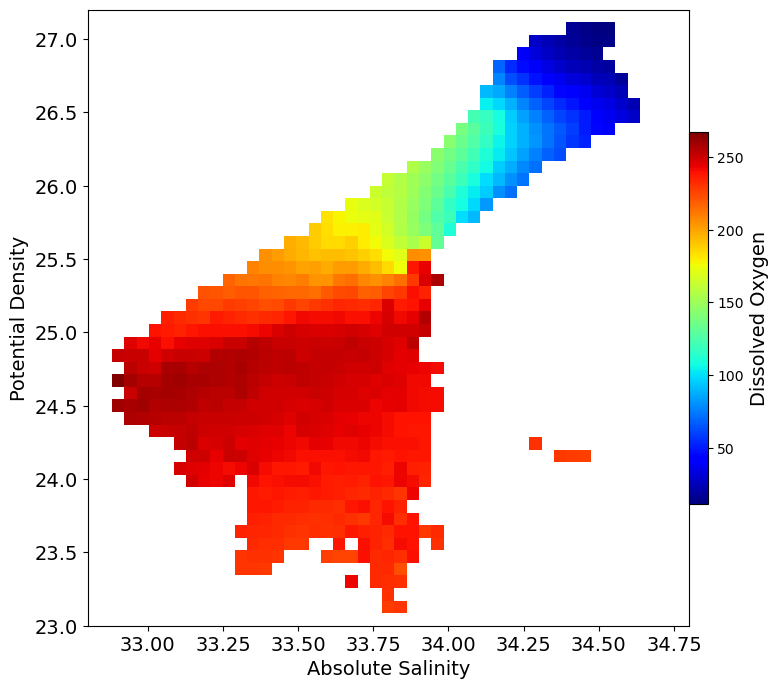

In [42]:
figures.show_grid(xedges, yedges, med_oxyT, 
              ('Absolute Salinity', 'Potential Density'),
              'Dissolved Oxygen', counts=countsT, min_counts=10)

# Early years

In [43]:
ds_early = space_time.cut_on_dates(ds, '2017-01-01', '2020-01-01')

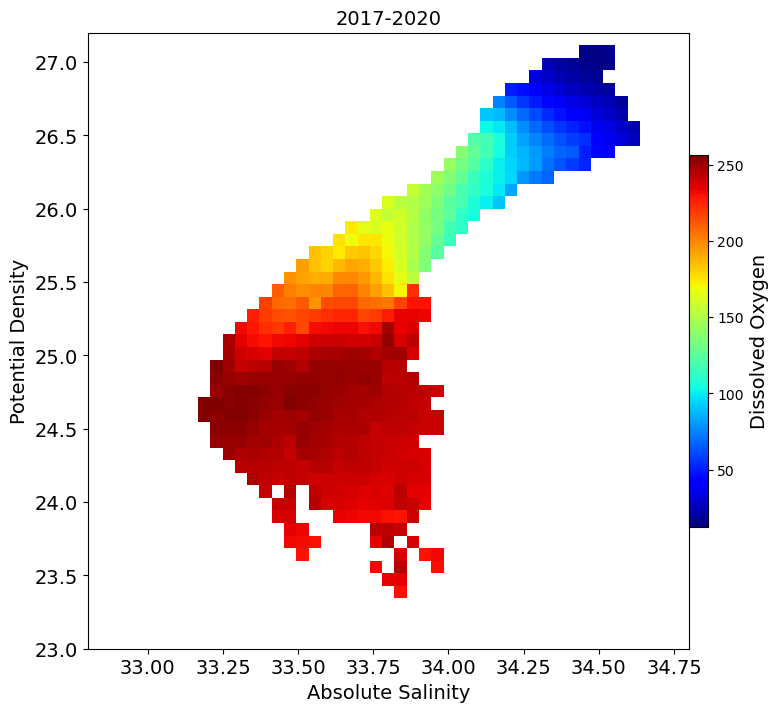

In [44]:
reload(figures)
med_oxyE, xedges, yedges, countsE, indices = oxygen.gen_map(ds_early)
figures.show_grid(xedges, yedges, med_oxyE, 
              ('Absolute Salinity', 'Potential Density'),
              'Dissolved Oxygen', counts=countsE, min_counts=10,
                 title='2017-2020')

## Diff

In [45]:
diff = med_oxyE - med_oxyT

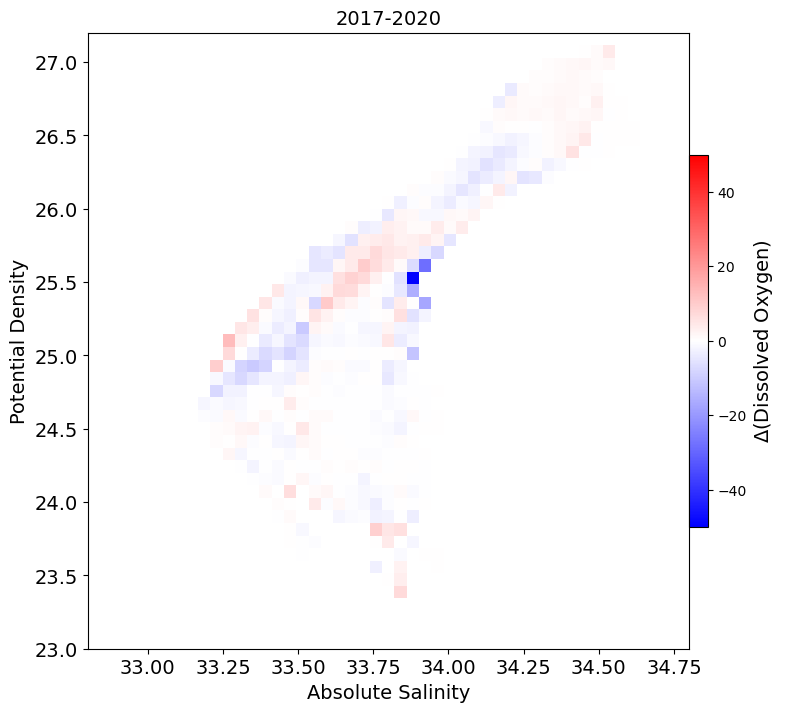

In [46]:
reload(figures)
figures.show_grid(xedges, yedges, diff, 
              ('Absolute Salinity', 'Potential Density'),
              r'$\Delta($Dissolved Oxygen)', 
                 title='2017-2020', cmap='bwr', vmnx=(-50,50))

# Late

In [47]:
ds_late = space_time.cut_on_dates(ds, '2020-01-01', '2029-01-01')

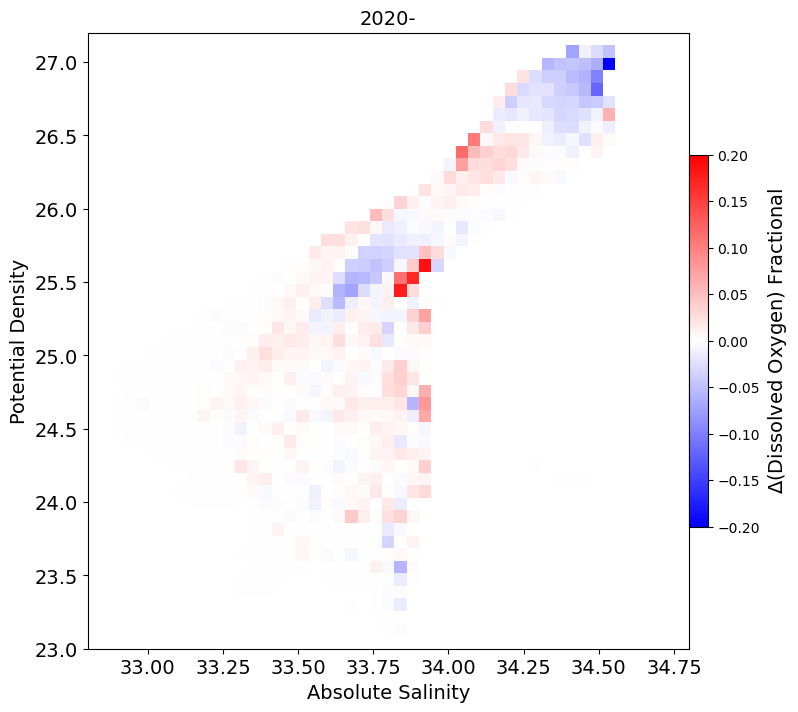

In [50]:
med_oxyL, xedges, yedges, countsL, indices = oxygen.gen_map(ds_late)
diff2 = med_oxyL - med_oxyT
figures.show_grid(xedges, yedges, diff2/med_oxyT, 
              ('Absolute Salinity', 'Potential Density'),
              r'$\Delta($Dissolved Oxygen) Fractional', 
                 title='2020-', cmap='bwr', 
                  vmnx=(-0.2,0.2))
                  #vmnx=(-50,50))

----